1. Load Data

In [36]:
import pandas as pd

# Ścieżka do pliku
file_path = r"D:\Projekty\Zimowe Igrzyska Olimpijskie\winter.csv"

# Wczytanie danych
df = pd.read_csv(file_path)

# Podgląd danych
df.head()


,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


2. Number of medals won by countries (Top 20)

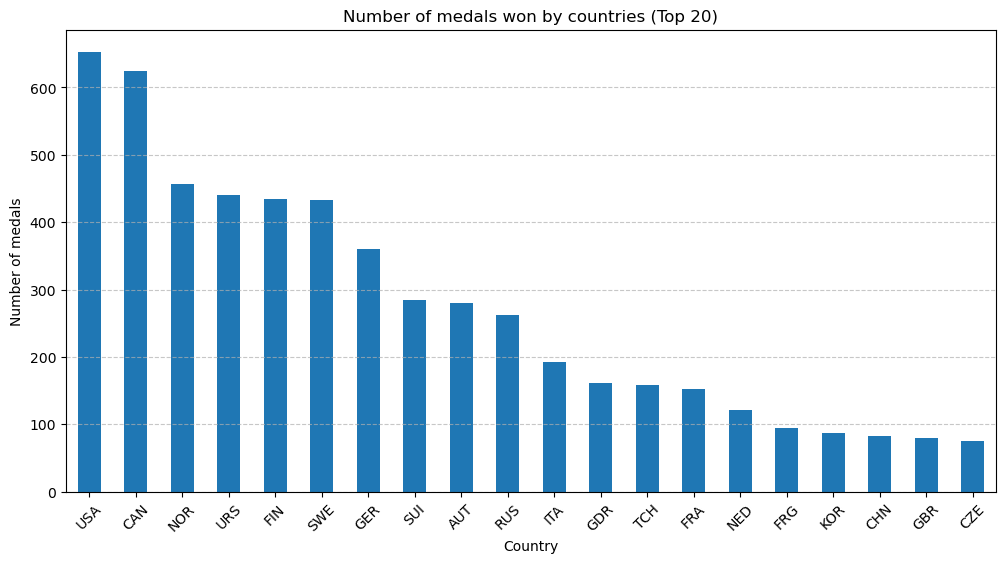

In [25]:
import matplotlib.pyplot as plt

# Grupowanie danych według kraju i liczenie liczby medali
medals_by_country = df.groupby("Country")["Medal"].count().sort_values(ascending=False)

# Wizualizacja
plt.figure(figsize=(12, 6))
medals_by_country.head(20).plot(kind="bar")
plt.title("Number of medals won by countries (Top 20)")
plt.xlabel("Country")
plt.ylabel("Number of medals")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
, alpha=0.7)
plt.show()


3. Distribution of medals by year

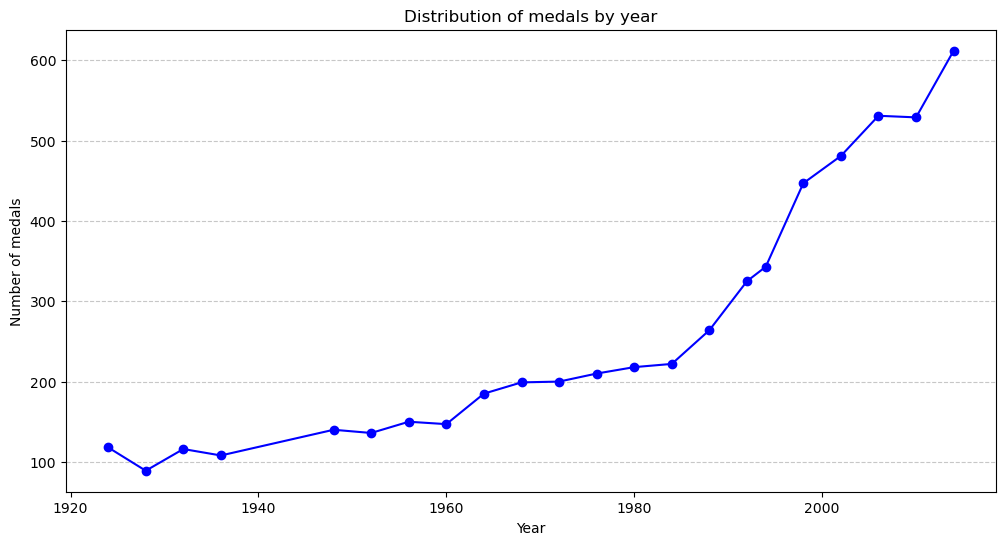

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Ponowne wczytanie danych z pliku
file_path = r"D:\Projekty\Zimowe Igrzyska Olimpijskie\winter.csv"
df = pd.read_csv(file_path)

# Grupowanie danych według roku i liczenie liczby medali
medals_by_year = df.groupby("Year")["Medal"].count()

# Wizualizacja rozkładu medali według lat
plt.figure(figsize=(12, 6))
plt.plot(medals_by_year.index, medals_by_year.values, marker="o", linestyle="-", color="b")
plt.title("Distribution of medals by year")
plt.xlabel("Year")
plt.ylabel("Number of medals")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

4. "Popularity of sports - percentage of medals (Top 10)"

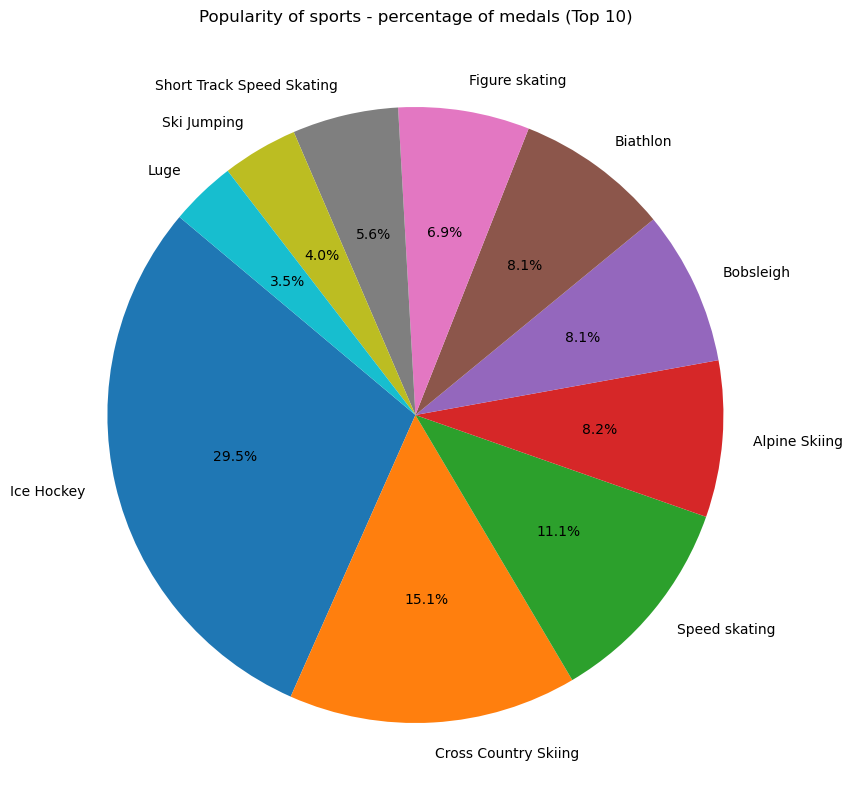

In [44]:
medals_by_discipline = df.groupby("Discipline")["Medal"].count().sort_values(ascending=False)
# Wizualizacja popularności sportów - wykres kołowy
plt.figure(figsize=(10, 10))
medals_by_discipline.head(10).plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="tab10")
plt.title("Popularity of sports - percentage of medals (Top 10)")
plt.ylabel("")  # Usunięcie etykiety y dla lepszego wyglądu
plt.show()


5. Number of medals won by the genders

C:\Users\matic\AppData\Local\Temp\ipykernel_21616\1896983405.py:6: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  medals_by_gender.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["lightskyblue", "pink"], cmap="tab10")


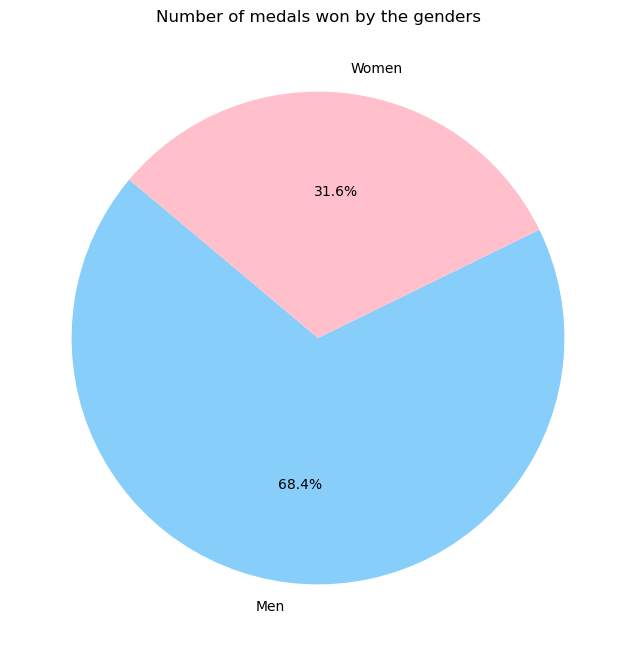

In [52]:
# Grupowanie danych według płci i liczenie liczby medali
medals_by_gender = df.groupby("Gender")["Medal"].count()

# Wizualizacja liczby medali zdobytych przez płcie - wykres kołowy
plt.figure(figsize=(8, 8))
medals_by_gender.plot(kind="pie", autopct="%1.1f%%", startangle=140, colors=["lightskyblue", "pink"], cmap="tab10")
plt.title("Number of medals won by the genders")
plt.ylabel("")  # Usunięcie etykiety y dla lepszego wyglądu
plt.show()

6. Number of medals won by Poland

<Figure size 1200x600 with 0 Axes>

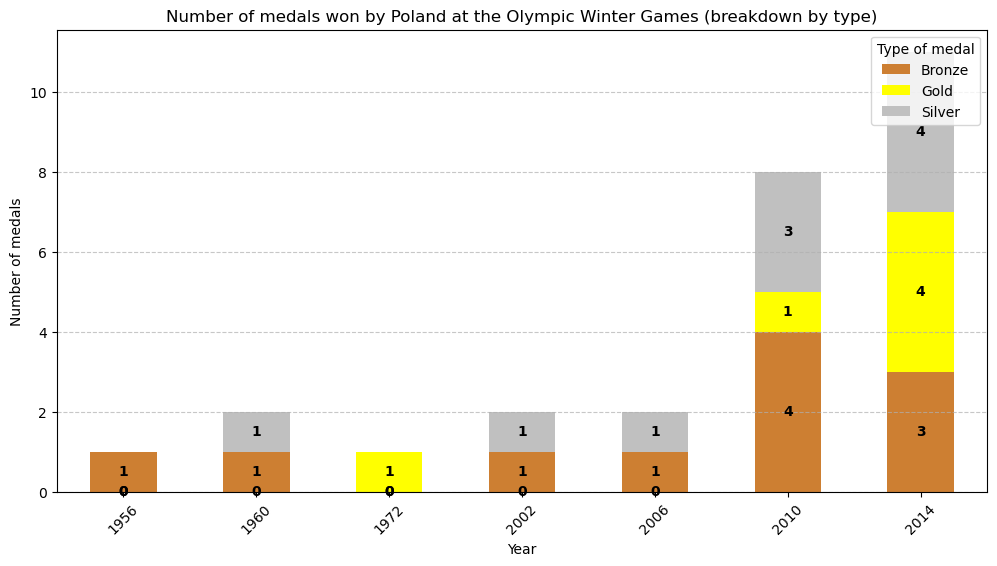

In [13]:

# Filtrowanie danych dla Polski
poland_medals = df[df["Country"] == "POL"]

# Grupowanie medali Polski według roku i rodzaju medalu
medals_by_type_poland = poland_medals.groupby(["Year", "Medal"])["Athlete"].count().unstack(fill_value=0)

# Wizualizacja liczby zdobytych medali przez Polskę (podział na typy)
plt.figure(figsize=(12, 6))
ax = medals_by_type_poland.plot(kind="bar", stacked=True, figsize=(12, 6), 
                                color=["#CD7F32", "yellow", "silver"])  # Brązowy, żółty, srebrny

# Dodanie etykiet wartości na słupkach
for container in ax.containers:
    ax.bar_label(container, label_type="center", fmt='%d', fontsize=10, fontweight="bold")

# Dodanie etykiet i siatki
plt.title("Number of medals won by Poland at the Olympic Winter Games (breakdown by type)")
plt.xlabel("Year")
plt.ylabel("Number of medals")
plt.xticks(rotation=45)
plt.legend(title="Type of medal", loc="upper right")  # Przeniesienie legendy na prawą stronę
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()



7. Medals Adam Małysz

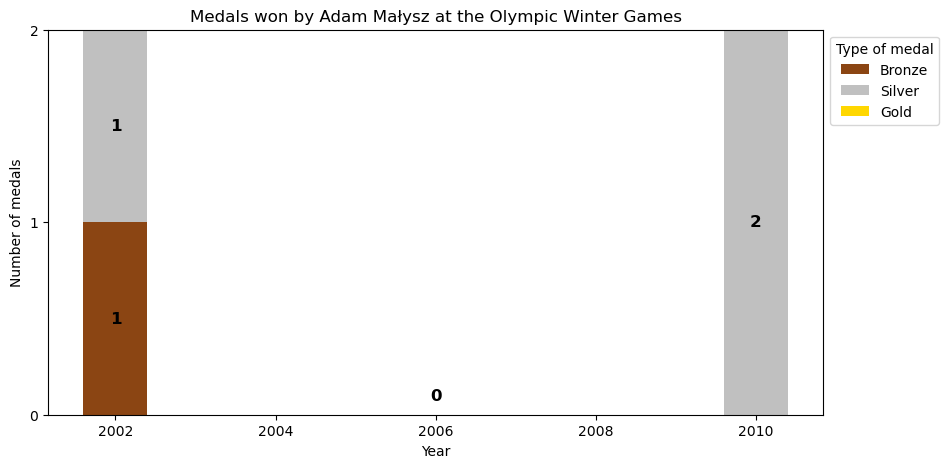

In [17]:
# Filtrowanie danych pod kątem Adama Małysza
malysz_medals_l = df[df['Athlete'].str.contains("MALYSZ", case=False, na=False)]

# Przygotowanie danych do wykresu
years = malysz_medals_l["Year"].unique()
medal_types = ["Gold", "Silver", "Bronze"]
medal_counts = {year: {medal: 0 for medal in medal_types} for year in years}

# Zliczanie medali dla każdego roku
for _, row in malysz_medals_l.iterrows():
    medal_counts[row["Year"]][row["Medal"]] += 1

# Dodanie roku 2006 z zerowymi wartościami do danych
if 2006 not in years:
    years = np.append(years, 2006)
    medal_counts[2006] = {medal: 0 for medal in medal_types}

# Posortowanie lat
years_sorted = sorted(medal_counts.keys())
gold_counts = [medal_counts[year]["Gold"] for year in years_sorted]
silver_counts = [medal_counts[year]["Silver"] for year in years_sorted]
bronze_counts = [medal_counts[year]["Bronze"] for year in years_sorted]

# Usunięcie lat 2004 i 2008
years_filtered = [year for year in years_sorted if year not in [2004, 2008]]
gold_filtered = [gold_counts[i] for i, year in enumerate(years_sorted) if year not in [2004, 2008]]
silver_filtered = [silver_counts[i] for i, year in enumerate(years_sorted) if year not in [2004, 2008]]
bronze_filtered = [bronze_counts[i] for i, year in enumerate(years_sorted) if year not in [2004, 2008]]

# Stworzenie wykresu słupkowego
# Stworzenie wykresu słupkowego z poprawioną etykietą dla brązowego medalu
fig, ax = plt.subplots(figsize=(10, 5))

# Rysowanie słupków
bars_bronze = ax.bar(years_filtered, bronze_filtered, color="saddlebrown", label="Bronze")
bars_silver = ax.bar(years_filtered, silver_filtered, bottom=bronze_filtered, color="silver", label="Silver")
bars_gold = ax.bar(years_filtered, gold_filtered, bottom=np.array(bronze_filtered) + np.array(silver_filtered), color="gold", label="Gold")

# Dodanie etykiet liczbowych na słupkach
for bars in [bars_bronze, bars_silver, bars_gold]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            y_position = bar.get_y() + height / 2  # Standardowe wyśrodkowanie etykiety
            if bar in bars_bronze and height == 1:  # Upewnienie się, że etykieta dla brązowego medalu pozostaje na środku
                y_position = bar.get_y() + height / 2  # Dokładne wyśrodkowanie w obrębie brązowego słupka
            ax.text(bar.get_x() + bar.get_width() / 2, y_position, str(int(height)),
                    ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Dodanie wartości 0 dla roku 2006
ax.text(2006, 0.1, '0', ha='center', va='center', fontsize=12, fontweight='bold', color='black')

# Ustawienia wykresu
ax.set_xlabel("Year")
ax.set_ylabel("Number of medals")
ax.set_title("Medals won by Adam Małysz at the Olympic Winter Games")
ax.yaxis.get_major_locator().set_params(integer=True)  # Ustawienie osi Y na liczby całkowite

# Przeniesienie legendy poza wykres
ax.legend(title="Type of medal", loc='upper left', bbox_to_anchor=(1, 1))

# Wyświetlenie wykresu
plt.show()
